clearing data aka processingm

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import os

In [60]:
filepath="laptop_data.csv"
if not os.path.exists(filepath):
    print("file not found")
else:
    df=pd.read_csv(filepath,index_col=0) 
    print(df.info())   


<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   528 non-null    object
 1   price   528 non-null    object
 2   link    528 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB
None


In [61]:
   df     

,title,price,link
0,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,"₹59,990",/lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
2,ASUS Vivobook 15 Core i3 10th Gen - (8 GB/256 ...,"₹27,990",/asus-vivobook-15-core-i3-10th-gen-8-gb-256-gb...
3,MSI Modern 14 Ryzen 5 Hexa Core 5500U - (8 GB/...,"₹39,990",/msi-modern-14-ryzen-5-hexa-core-5500u-8-gb-51...
4,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"₹48,990",/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb...
...,...,...,...
523,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,"₹59,990",/lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
524,ASUS Ryzen 5 Hexa Core - (8 GB/512 GB SSD/Wind...,"₹55,600",/asus-ryzen-5-hexa-core-8-gb-512-gb-ssd-window...
525,LG Gram Core i5 11th Gen - (8 GB/256 GB SSD/Wi...,"₹76,990",/lg-gram-core-i5-11th-gen-8-gb-256-gb-ssd-wind...
526,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,"₹2,07,990",/asus-rog-zephyrus-g15-2022-90whr-battery-ryze...


In [62]:
df.duplicated().sum()

0

In [63]:
df["title"].duplicated().sum ## check duplucate values and list them

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
523     True
524    False
525    False
526     True
527     True
Name: title, Length: 528, dtype: bool>

## lambda exxpression:

f=lambda x:x*2
f(5)
f(230)
f(.5)

OR

f(x)=x*2



In [64]:
#we have to clean price and make it a number
f= lambda i:i*4
print(f(4))

g=lambda x,y:x+y**2
print(g(2,3))

16
11


In [65]:
##for row in df.interrows():

    #print(row)
#appl()  mehod ,applymap() function on series or in datafarames   


In [66]:
df["price"].apply(lambda val:val)

0      ₹3,90,990
1        ₹59,990
2        ₹27,990
3        ₹39,990
4        ₹48,990
         ...    
523      ₹59,990
524      ₹55,600
525      ₹76,990
526    ₹2,07,990
527    ₹1,16,990
Name: price, Length: 528, dtype: object

In [67]:
"₹3,90,990"[1:]

'3,90,990'

In [68]:
int("₹3,90,990"[1:].replace(",",""))

390990

In [69]:
df["price"].apply(lambda val:val[1:].replace(",","")) ##when notebook gives ans it means that data is not saved

0      390990
1       59990
2       27990
3       39990
4       48990
        ...  
523     59990
524     55600
525     76990
526    207990
527    116990
Name: price, Length: 528, dtype: object

In [81]:
df["price_clean"]=df["price"].apply(lambda val:int(val[1:].replace(",","")))

In [71]:
df.columns

Index(['title', 'price', 'link', 'price_clean'], dtype='object')

In [72]:
df.sort_values(by="price_clean",ascending=False,inplace=True) ## inplace updates the data

In [73]:
def clean_title(title):
   return title.split("-")[0].strip(),title.split("-")[1].strip()
df[["name","configuration"]]=df["title"].apply(clean_title).apply(pd.Series)


In [74]:
def get_brand(name):
    return name.split()[0]
df["brand"]=df["name"].apply(get_brand)    

In [75]:
df["brand"].value_counts()

ASUS         128
MSI          127
Lenovo        72
DELL          58
HP            57
APPLE         28
acer          26
Infinix       17
LG             4
realme         4
RedmiBook      2
Mi             1
Nokia          1
SAMSUNG        1
Avita          1
ALIENWARE      1
Name: brand, dtype: int64

<AxesSubplot: title={'center': 'Brand distribution'}>

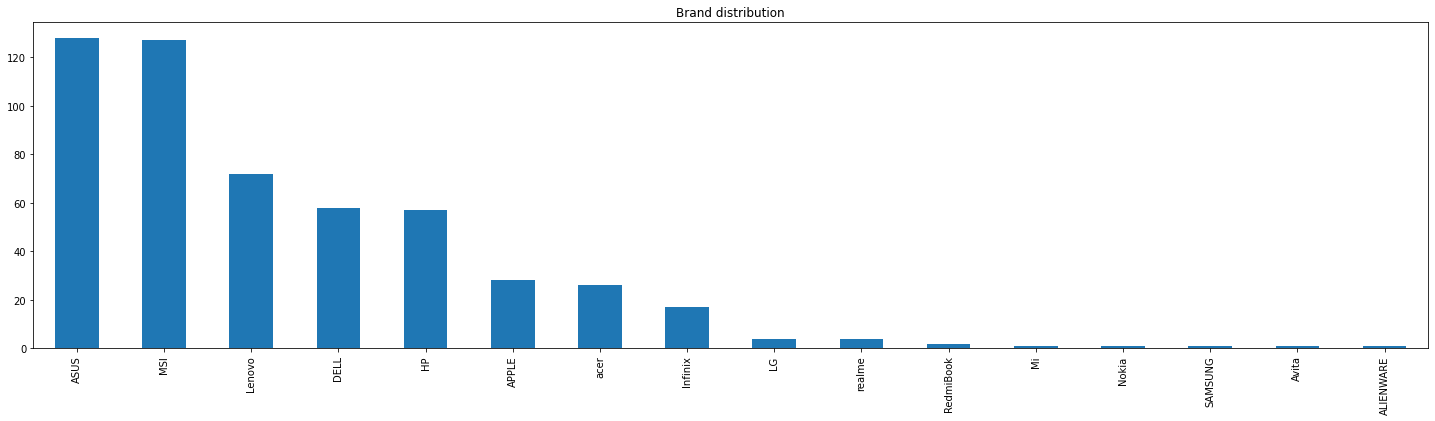

In [76]:
df["brand"].value_counts().plot(kind="bar",title="Brand distribution",figsize=(25,6))

In [80]:
df.info

<bound method DataFrame.info of                                                  title      price  \
250  acer Predator Helios 300 Octa Core i7 10th Gen...    ₹99,990   
270  ASUS Zenbook S 13 Ryzen 5 Hexa Core 6600U - (1...    ₹99,990   
273  ASUS Zenbook S 13 Ryzen 5 Hexa Core 6600U - (1...    ₹99,990   
473  acer Predator Helios 300 Core i7 11th Gen - (1...    ₹99,990   
12   ASUS ROG Strix G15 Ryzen 7 Octa Core 4800H - (...    ₹95,990   
..                                                 ...        ...   
506  DELL Core i7 11th Gen - (16 GB/512 GB SSD/Wind...  ₹1,02,990   
484  DELL Core i7 11th Gen - (16 GB/512 GB SSD/Wind...  ₹1,02,990   
316  Lenovo Yoga Slim 7 Intel EVO Core i7 11th Gen ...  ₹1,02,990   
454  Lenovo Yoga 7 Core i7 11th Gen - (16 GB/512 GB...  ₹1,01,299   
341  HP HP ZBook Firefly Core i7 11th Gen - (16 GB/...  ₹1,00,000   

                                                  link price_clean  \
250  /acer-predator-helios-300-octa-core-i7-10th-ge...       99990   

<AxesSubplot: title={'center': 'Price Distribution'}>

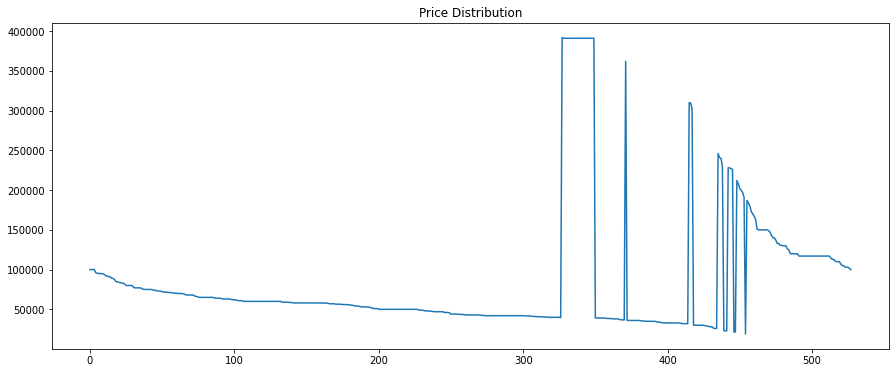

In [82]:
df["price_clean"].plot(kind="line",use_index=False,title="Price Distribution",figsize=(15,6))

<AxesSubplot: >

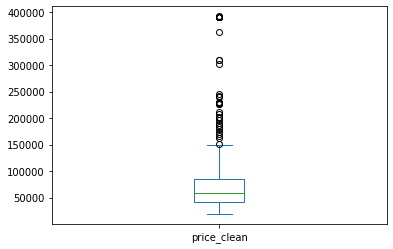

In [83]:
df["price_clean"].plot(kind="box")